/Users/johnwong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/johnwong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/johnwong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34442 (\N{CJK UNIFIED IDEOGRAPH-868A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/johnwong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/johnwong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\

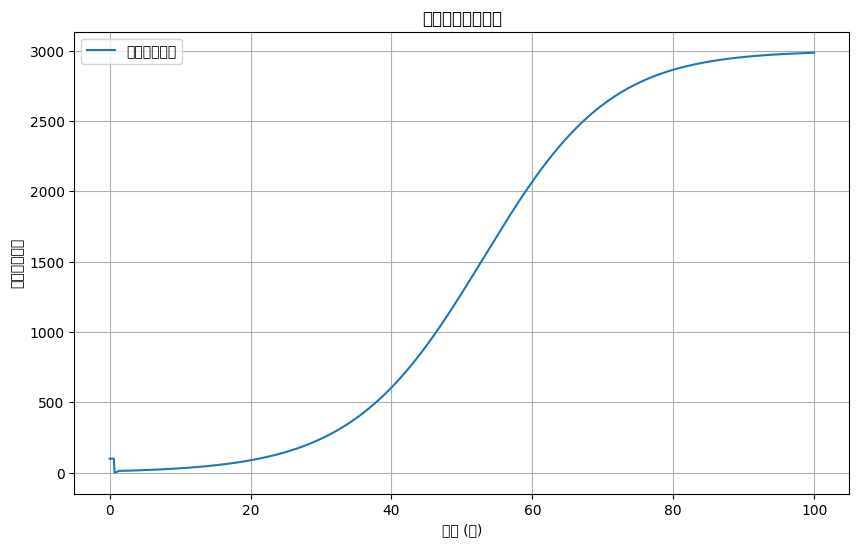

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
dt = 0.1  # 时间步长，1天
T = 100  # 总模拟时间，100天
K = 5000  # 环境容量
r = 0.2  # 日产卵率
mu = 0.05  # 自然死亡率
mu_c = 0.03  # 控制措施导致的额外死亡率
tau = 7  # 从卵到成年的时间延迟，单位：天
initial_population = 100  # 初始成年蚊子数量

# 时间数组
time = np.arange(0, T+dt, dt)

# 初始化成年蚊子数量数组，考虑到初始时延迟
N = np.zeros(len(time))
N[:tau] = initial_population  # 假设在模拟开始前的τ天内，成年蚊子数量为初始值

# Euler方法数值求解
for t in range(tau, len(time)-1):
    if t >= tau:
        delayed_index = t - tau
        reproduction = r * N[delayed_index] * (1 - N[t]/K)
    else:
        reproduction = 0
    death_rate = (mu + mu_c) * N[t]
    N[t+1] = N[t] + dt * (reproduction - death_rate)
    if N[t+1] < 0:  # 确保蚊子数量不会降到0以下
        N[t+1] = 0

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(time, N, label='成年蚊子数量')
plt.title('蚊子种群动态模型')
plt.xlabel('时间 (天)')
plt.ylabel('成年蚊子数量')
plt.legend()
plt.grid(True)
plt.show()
